# Problem 1 - 

Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

#### Data Description :

Undergrad : person is under graduated or not

Marital.Status : marital status of a person

Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government

Work Experience : Work experience of an individual person

Urban : Whether that person belongs to urban area or not

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
fraud_data=pd.read_csv('C:/Users/ancha/Downloads/Fraud_check.csv')
fraud_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


# EDA

In [3]:
fraud_data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [8]:
fraud_data['tax_type']=np.where(fraud_data['Taxable.Income']<=30000,'Risky','Good')
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_type
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [9]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
 6   tax_type         600 non-null    object
dtypes: int64(3), object(4)
memory usage: 32.9+ KB


In [10]:
fraud_data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [11]:
fraud_data.shape

(600, 7)

In [12]:
fraud_data.duplicated().value_counts()

False    600
dtype: int64

In [13]:
for i, column in enumerate (fraud_data.columns,1):
    print(fraud_data[column].value_counts())

YES    312
NO     288
Name: Undergrad, dtype: int64
Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64
59689    2
68833    1
60822    1
93090    1
79373    1
        ..
61906    1
31088    1
70365    1
56536    1
96519    1
Name: Taxable.Income, Length: 599, dtype: int64
57194     2
162777    2
50047     1
130912    1
64070     1
         ..
145744    1
58225     1
28661     1
117260    1
158137    1
Name: City.Population, Length: 598, dtype: int64
10    31
13    28
30    25
28    25
12    25
14    24
11    23
21    23
5     22
27    22
26    22
7     21
29    21
19    21
16    19
6     19
25    19
2     19
17    18
15    18
24    17
23    16
20    15
0     14
1     14
8     14
3     14
4     14
22    13
9     13
18    11
Name: Work.Experience, dtype: int64
YES    302
NO     298
Name: Urban, dtype: int64
Good     476
Risky    124
Name: tax_type, dtype: int64


# Label Encoding

In [19]:
fraud_data1=fraud_data.copy()

for i, column in enumerate(fraud_data1[[feature for feature in fraud_data1.columns if fraud_data1[feature].dtypes == 'O']].columns, 1):
    label_encoder= preprocessing.LabelEncoder()
    fraud_data1[column]=label_encoder.fit_transform(fraud_data1[column])

In [20]:
fraud_data1= fraud_data1.drop('Taxable.Income',axis=1)

from sklearn.preprocessing import StandardScaler
std=StandardScaler()
std.fit_transform(fraud_data1)

array([[-1.040833  ,  1.16079994, -1.17852072, -0.62914254,  0.99335541,
        -0.51039612],
       [ 0.96076892, -1.27444469,  0.50850002,  0.27636996,  0.99335541,
        -0.51039612],
       [-1.040833  , -0.05682237,  1.03310911,  1.63463872,  0.99335541,
        -0.51039612],
       ...,
       [-1.040833  , -1.27444469,  0.90969648, -1.76103318,  0.99335541,
        -0.51039612],
       [ 0.96076892, -0.05682237,  1.43219749,  0.1631809 , -1.00668904,
        -0.51039612],
       [-1.040833  , -1.27444469,  0.9915901 ,  0.04999184, -1.00668904,
        -0.51039612]])

# Data Splitting for Testing

In [27]:
x= fraud_data1.drop('tax_type',axis=1)
y= fraud_data1['tax_type']

In [28]:
x.shape,y.shape

((600, 5), (600,))

In [29]:
y.value_counts()

0    476
1    124
Name: tax_type, dtype: int64

In [30]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=40)

In [31]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [32]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: tax_type, Length: 600, dtype: int32

In [33]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(480, 5) (120, 5) (480,) (120,)


# Building Decision Tree Classifier using Entropy Criteria

In [35]:
model= DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

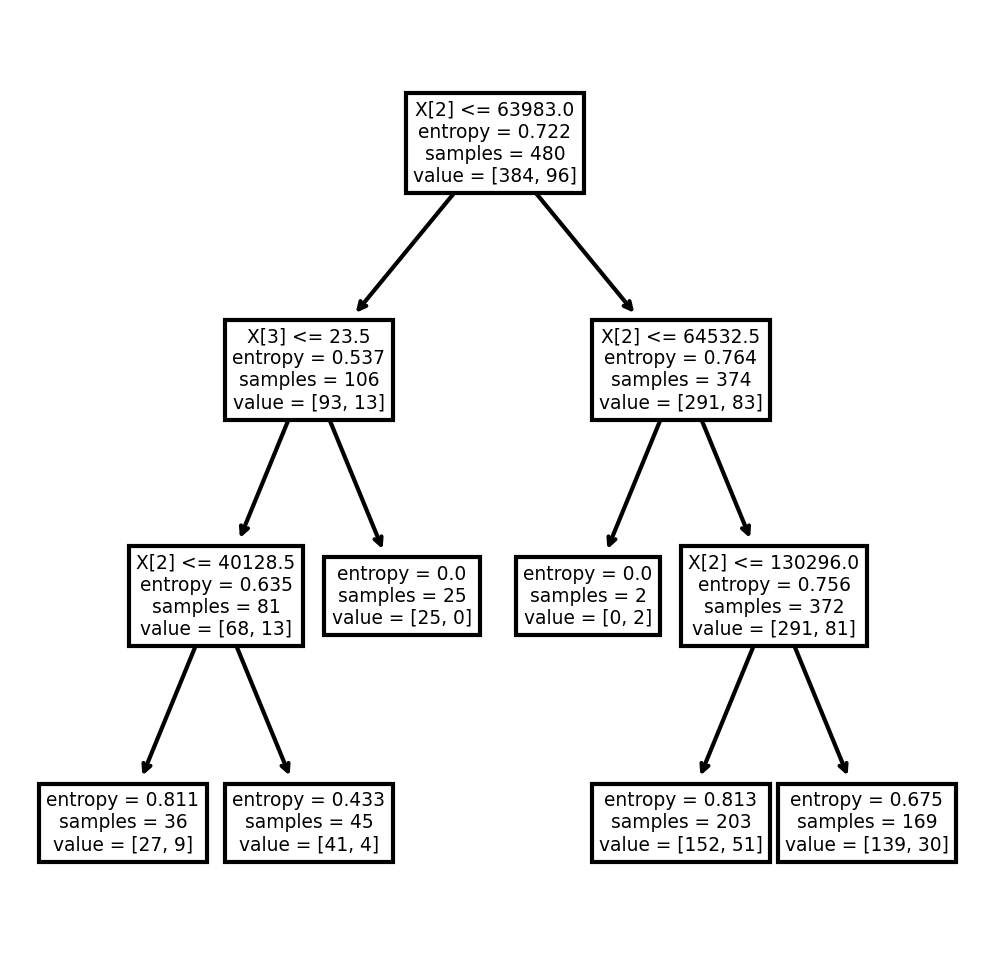

In [38]:
fig,axes= plt.subplots(nrows=1, ncols=1,figsize=(4,4),dpi=300)

#Plot the Decision Tree
tree.plot_tree(model);

In [39]:
fraud_data1.columns

Index(['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban', 'tax_type'],
      dtype='object')

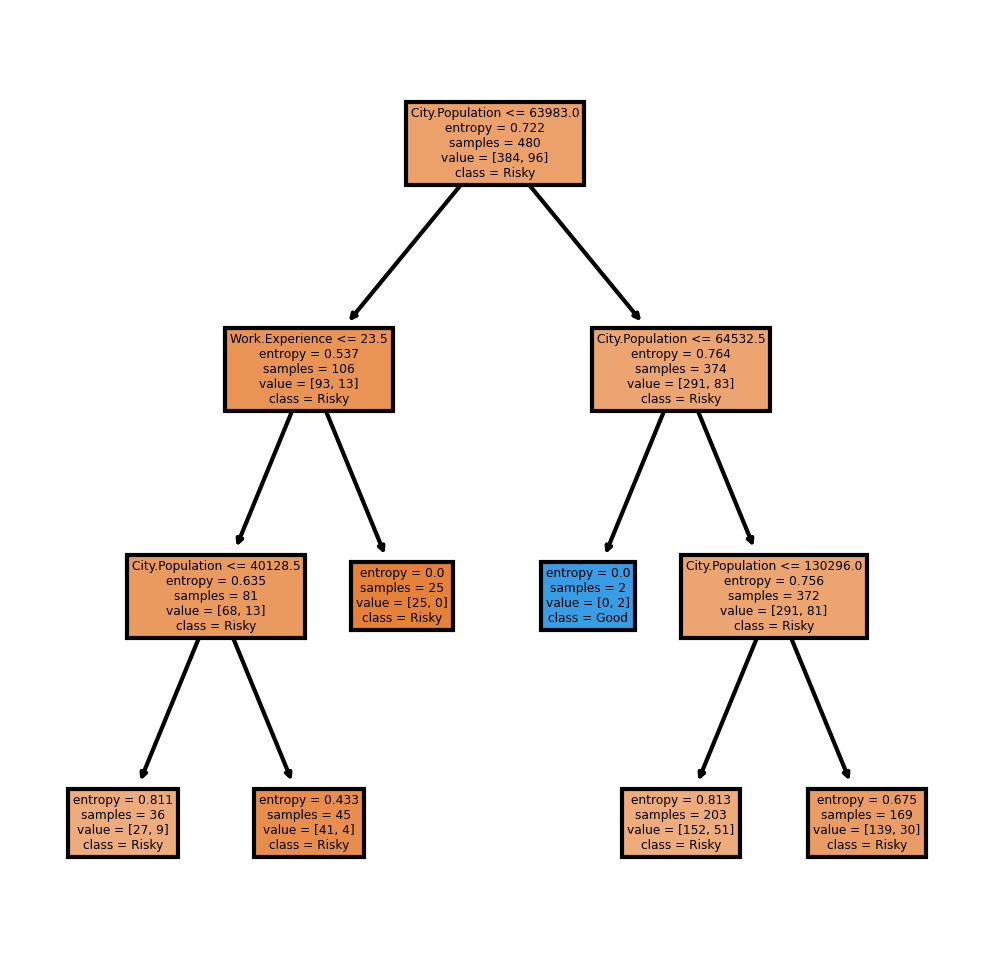

In [42]:
fn=['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']
cn=['Risky','Good'] 

fig,axes= plt.subplots(nrows=1, figsize=(4,4), dpi=300)
tree.plot_tree(model,feature_names=fn, class_names=cn, filled= True);

In [43]:
#Predicting on test data.
preds=model.predict(x_test)
pd.Series(preds).value_counts()

0    120
dtype: int64

In [44]:
y_test.value_counts()

0    92
1    28
Name: tax_type, dtype: int64

In [45]:
pd.crosstab(y_test,preds)

col_0,0
tax_type,
0,92
1,28


In [46]:
#Accuracy of the prediction = actuals
np.mean(preds==y_test)

0.7666666666666667

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,preds)

0.7666666666666667

# Building Decision Tree Classifier (CART) using Gini Criteria

In [51]:
model_gini= DecisionTreeClassifier(criterion='gini',max_depth=8,random_state=40)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, random_state=40)

In [53]:
# Prediction,accuracy
pred=model_gini.predict(x_test)
np.mean(pred==y_test)

0.7166666666666667

In [54]:
accuracy_score(y_test,pred)

0.7166666666666667

# Bagging

In [111]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [56]:
kfold= KFold(n_splits=10)
cart=DecisionTreeClassifier()
num_trees=100

model= BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=40)
results=cross_val_score(model,x,y,cv=kfold)

In [57]:
model.fit(x_train,y_train);
print('\n confusion matrix :\n',confusion_matrix(y_test,model.predict(x_test)))
print('\n accuracy :\n',accuracy_score(y_test,model.predict(x_test)))


 confusion matrix :
 [[88  4]
 [27  1]]

 accuracy :
 0.7416666666666667


# Boosting

In [112]:
from sklearn.ensemble import AdaBoostClassifier

In [59]:
num_trees=10
seed=0
kfold= KFold(n_splits=10)

model=AdaBoostClassifier(n_estimators=num_trees,random_state=seed)
results=cross_val_score(model,x,y,cv=kfold)

In [60]:
model.fit(x_train,y_train);
print('\n confusion matrix :\n', confusion_matrix(y_test,model.predict(x_test)))
print('\n accuracy :\n',accuracy_score(y_test,model.predict(x_test)))


 confusion matrix :
 [[92  0]
 [28  0]]

 accuracy :
 0.7666666666666667


## Conclusion:

In [64]:
Accuracy_tab={'Model':pd.Series(['Entropy','gini','Bagging','Boosting']),
              'accuracy':pd.Series(['76%','71%','74%','76%'])}
Accuracy_tab=pd.DataFrame(Accuracy_tab)
Accuracy_tab

,Model,accuracy
0,Entropy,76%
1,gini,71%
2,Bagging,74%
3,Boosting,76%


# Problem 2

A cloth manufacturing company is interested to know about the segment or attributes causes high sale.

Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) &
           all other variable will be independent in the analysis.

About the data:

Let’s consider a Company dataset with around 10 variables and 400 records. The attributes are as follows:

 Sales -- Unit sales (in thousands) at each location

 Competitor Price -- Price charged by competitor at each location

 Income -- Community income level (in thousands of dollars)

 Advertising -- Local advertising budget for company at each location (in thousands of dollars)

 Population -- Population size in region (in thousands)

 Price -- Price company charges for car seats at each site

 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

 Age -- Average age of the local population

 Education -- Education level at each location

 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location

 US -- A factor with levels No and Yes to indicate whether the store is in the US or not

In [66]:
company=pd.read_csv('C:/Users/ancha/Downloads/Company_Data.csv')
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# EDA

In [67]:
company.Sales.value_counts()

7.80    4
8.77    3
9.32    3
4.10    3
6.20    3
       ..
3.67    1
7.62    1
9.54    1
8.41    1
9.71    1
Name: Sales, Length: 336, dtype: int64

In [68]:
#Adding sales category
company['Sales_cat']=np.where(company['Sales']<=company['Sales'].mean(),'High','Low')
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_cat
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Low
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,Low
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Low
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,High
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,High


In [70]:
company.Sales_cat= company.Sales_cat.astype(str)

In [71]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_cat
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Low
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,Low
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Low
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,High
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,High
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,Low
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,High
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,High
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,High


In [73]:
company.Sales_cat.value_counts()

High    201
Low     199
Name: Sales_cat, dtype: int64

In [74]:
company.shape

(400, 12)

In [75]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
 11  Sales_cat    400 non-null    object 
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


In [76]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


# Label Encoding

In [78]:
company1=company.copy()
for i, column in enumerate(company1[[feature for feature in company1.columns if company1[feature].dtypes == 'O']].columns, 1):
    label_encoder=preprocessing.LabelEncoder()
    company1[column]=label_encoder.fit_transform(company1[column])
    
company1=company1.drop('Sales',axis=1)

In [79]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

std=MinMaxScaler()
std.fit_transform(company1)

array([[0.62244898, 0.52525253, 0.37931034, ..., 1.        , 1.        ,
        1.        ],
       [0.34693878, 0.27272727, 0.55172414, ..., 1.        , 1.        ,
        1.        ],
       [0.36734694, 0.14141414, 0.34482759, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.86734694, 0.05050505, 0.4137931 , ..., 1.        , 1.        ,
        0.        ],
       [0.23469388, 0.58585859, 0.24137931, ..., 1.        , 1.        ,
        0.        ],
       [0.58163265, 0.16161616, 0.        , ..., 1.        , 1.        ,
        1.        ]])

# Data Splitting for Testing

In [122]:
x= company1.drop('Sales_cat',axis=1)
y= company1['Sales_cat']

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.30,random_state=40)

In [123]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [124]:
y

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: Sales_cat, Length: 400, dtype: int32

In [125]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(280, 10) (280,) (120, 10) (120,)


# Building Decision Tree Classifier using Entropy Criteria

In [134]:
model= DecisionTreeClassifier(criterion='entropy',max_depth=7)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

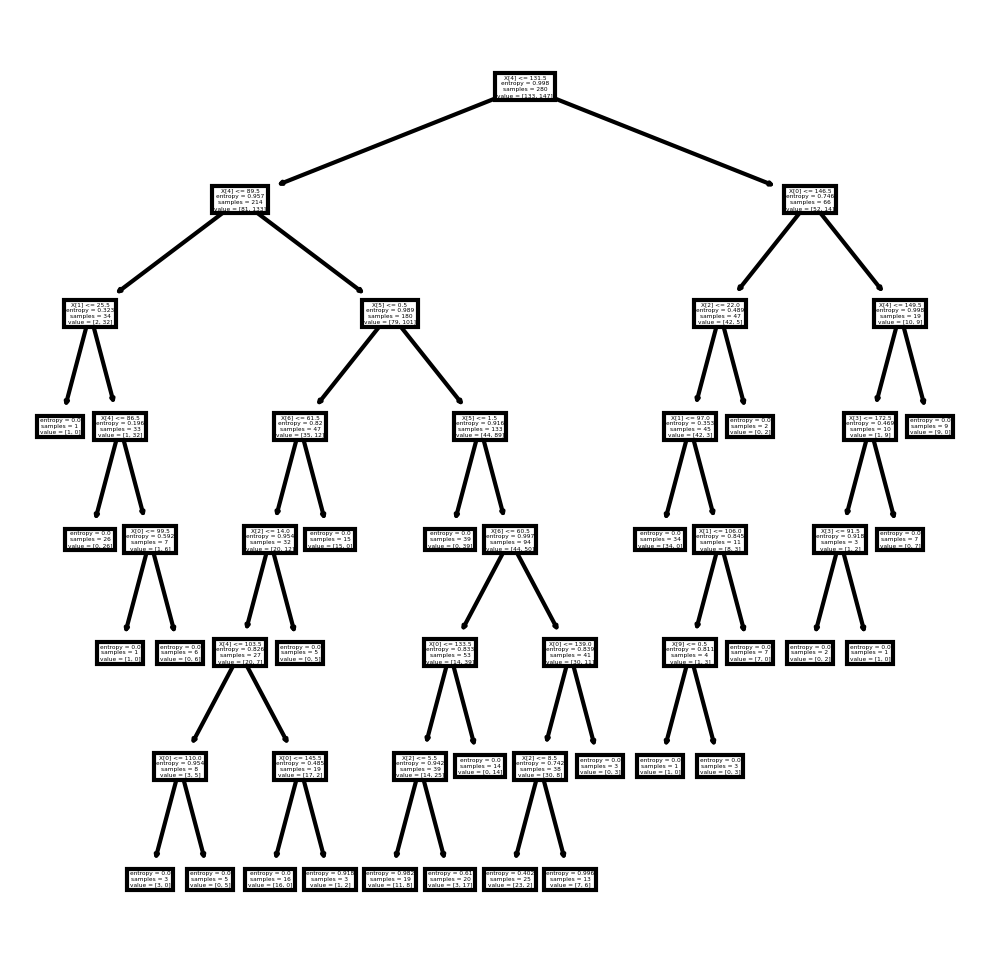

In [136]:
fig,axes= plt.subplots(nrows=1, ncols=1,figsize=(4,4),dpi=300)

#Plot the Decision Tree
tree.plot_tree(model);

In [90]:
company1.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'Sales_cat'],
      dtype='object')

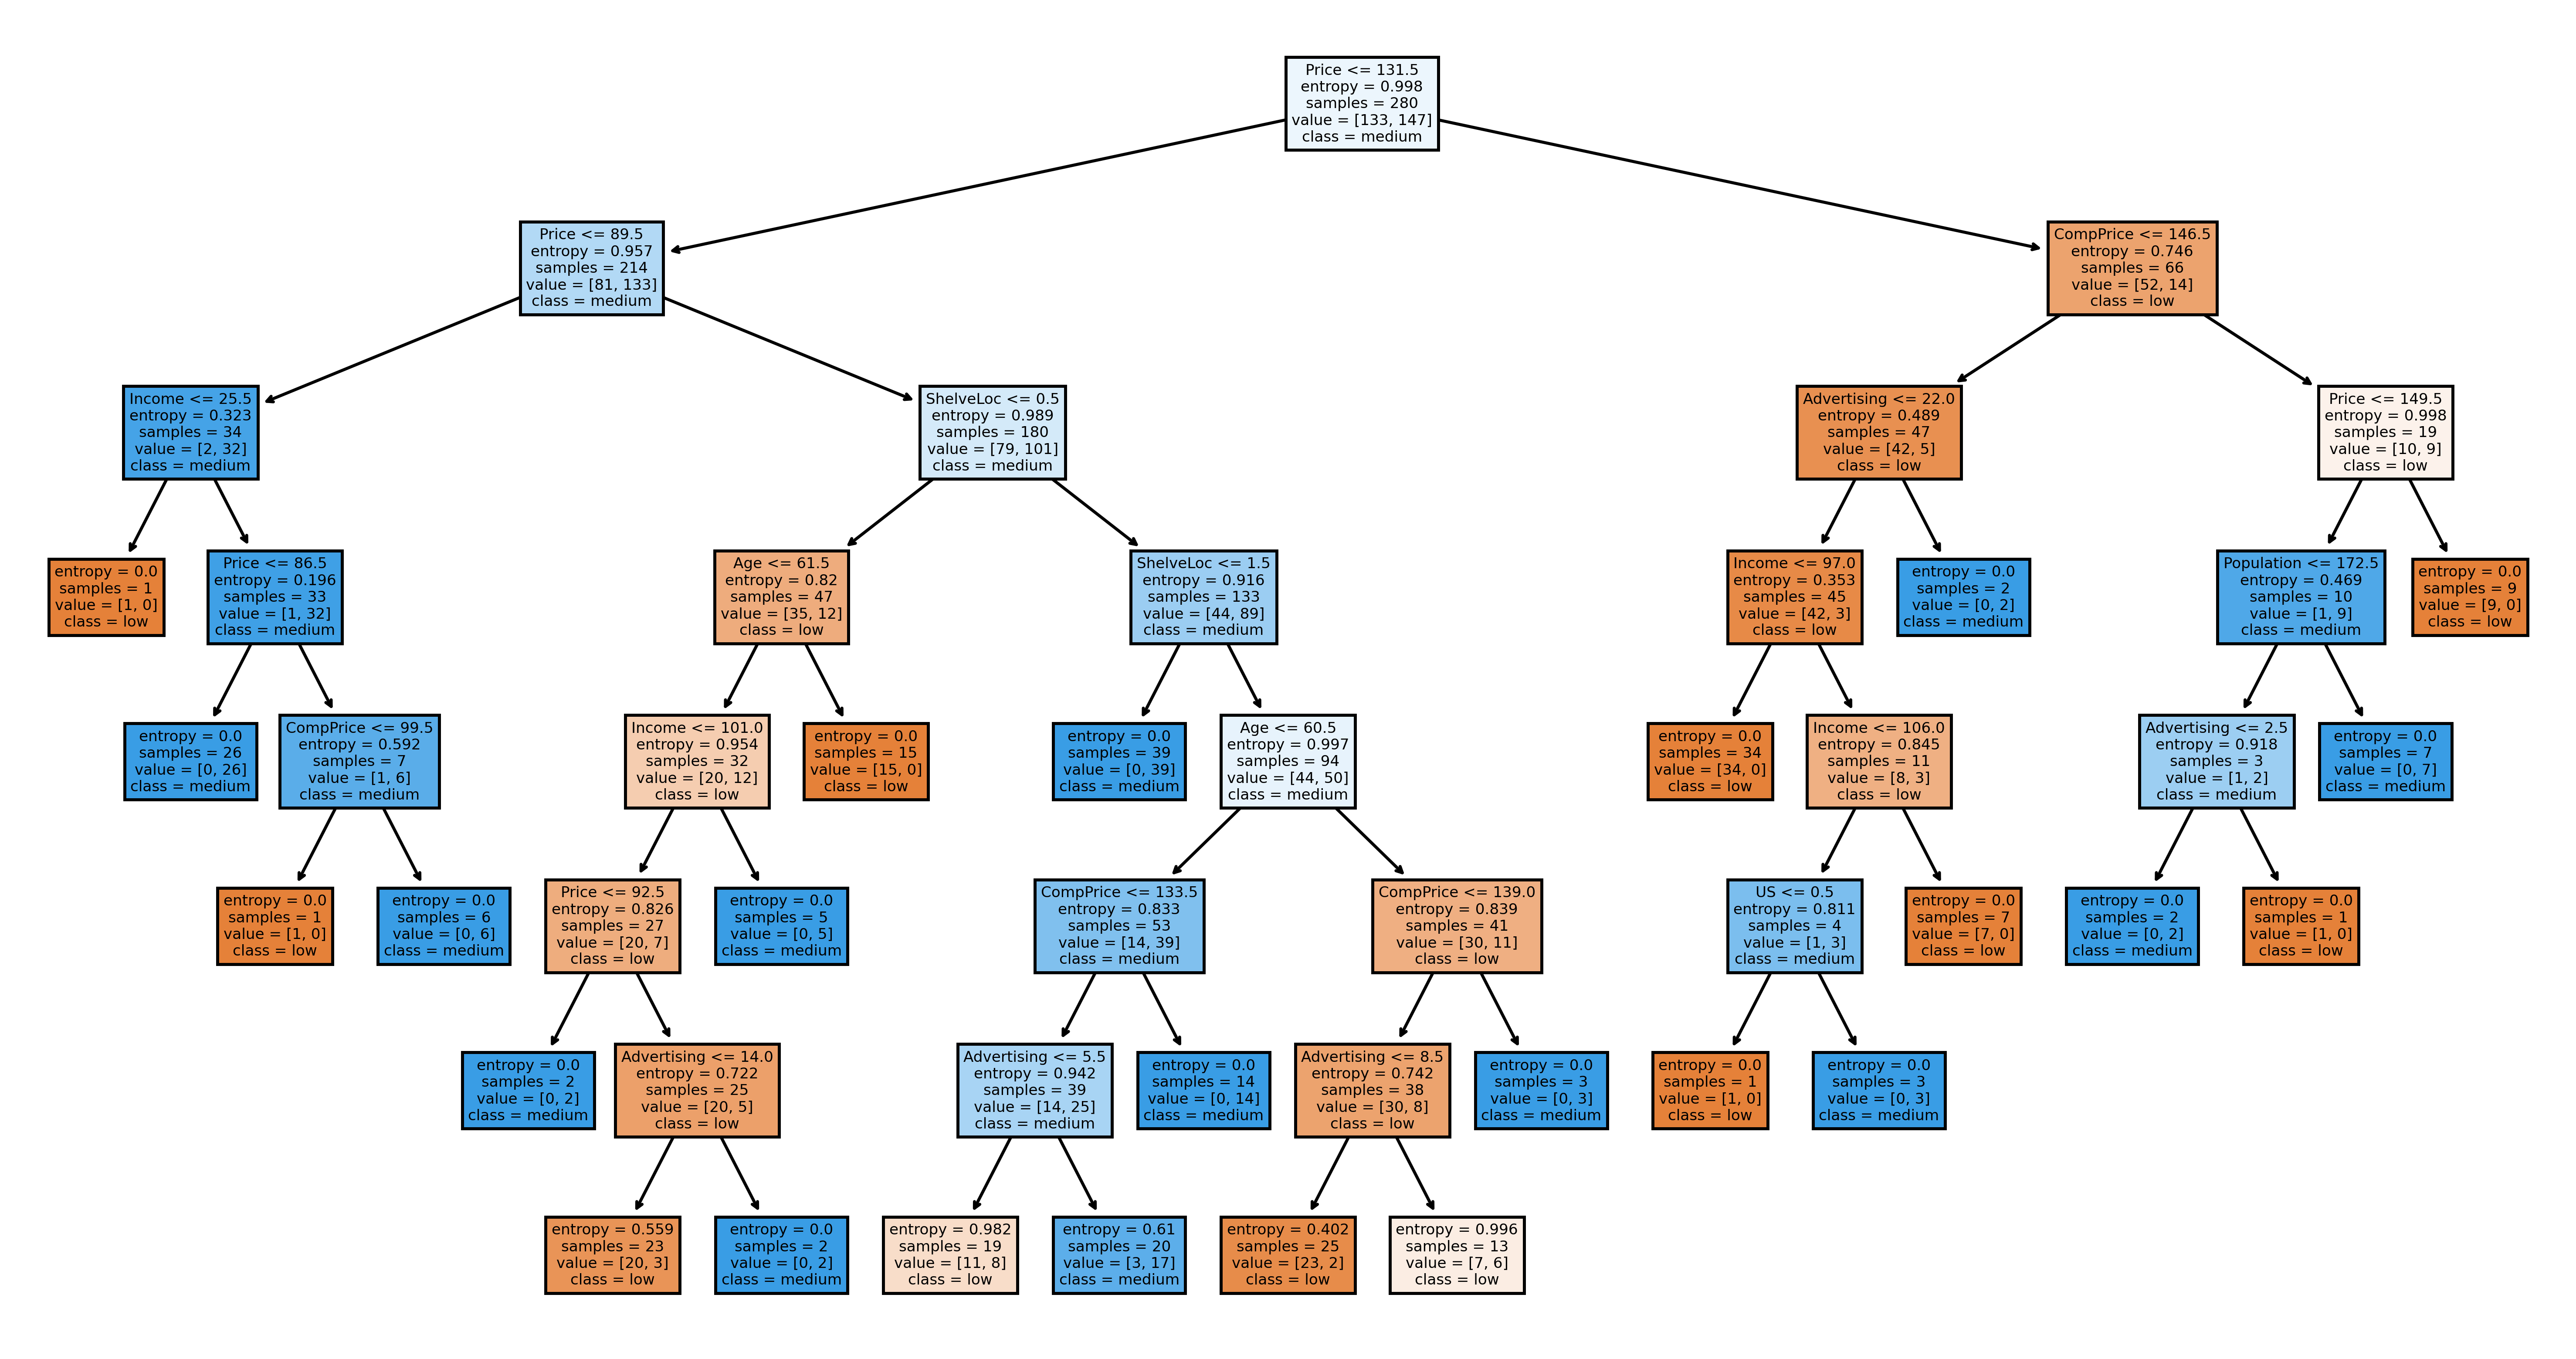

In [91]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['low','medium','high'] 

fig,axes= plt.subplots(nrows=1, figsize=(15,8), dpi=500)
tree.plot_tree(model,feature_names=fn, class_names=cn, filled= True);

In [92]:
#Test data prediction
preds=model.predict(x_test)
pd.Series(preds).value_counts()

0    76
1    44
dtype: int64

In [126]:
y_test.value_counts()

0    68
1    52
Name: Sales_cat, dtype: int64

In [127]:
pd.crosstab(y_test,preds)

col_0,0,1
Sales_cat,,
0,55,13
1,21,31


In [128]:
accuracy_score(y_test,preds)

0.7166666666666667

In [129]:
np.mean(preds==y_test)

0.7166666666666667

# Building Decision Tree Classifier (CART) using Gini Criteria

In [104]:
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=4)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [130]:
#Accuracy prediction
pred=model_gini.predict(x_test)
np.mean(pred==y_test)

0.675

In [131]:
accuracy_score(y_test,pred)

0.675

# Bagging


In [113]:
kfold= KFold(n_splits=10)
cart=DecisionTreeClassifier()
num_trees=100

model= BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=40)
results=cross_val_score(model,x,y,cv=kfold)

In [115]:
model.fit(x_train,y_train);
print('\n confusion matrix :\n',confusion_matrix(y_test,model.predict(x_test)))
print('\n accuracy :\n',accuracy_score(y_test,model.predict(x_test)))


 confusion matrix :
 [[52 16]
 [13 39]]

 accuracy :
 0.7583333333333333


# Boosting

In [117]:
num_trees=10
seed=0
kfold= KFold(n_splits=10)

model=AdaBoostClassifier(n_estimators=num_trees,random_state=seed)
results=cross_val_score(model,x,y,cv=kfold)

In [118]:
model.fit(x_train,y_train);
print('\n confusion matrix :\n', confusion_matrix(y_test,model.predict(x_test)))
print('\n accuracy :\n',accuracy_score(y_test,model.predict(x_test)))


 confusion matrix :
 [[50 18]
 [11 41]]

 accuracy :
 0.7583333333333333


# Conclusion

In [119]:
Accuracy_tab={'Model':pd.Series(['Entropy','gini','Bagging','Boosting']),
              'accuracy':pd.Series(['71%','67%','75%','75%'])}
Accuracy_tab=pd.DataFrame(Accuracy_tab)
Accuracy_tab

,Model,accuracy
0,Entropy,71%
1,gini,67%
2,Bagging,75%
3,Boosting,75%
